In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import requests
from datetime import datetime, timedelta
from shapely.geometry import Point
from busSim import BusSim
from graph import Graph

In [4]:
DATA_PATH = "./"
DAY = "monday"
START_TIME = "12:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # This is added back by InteractiveShellApp.init_path()


39674989.7312322

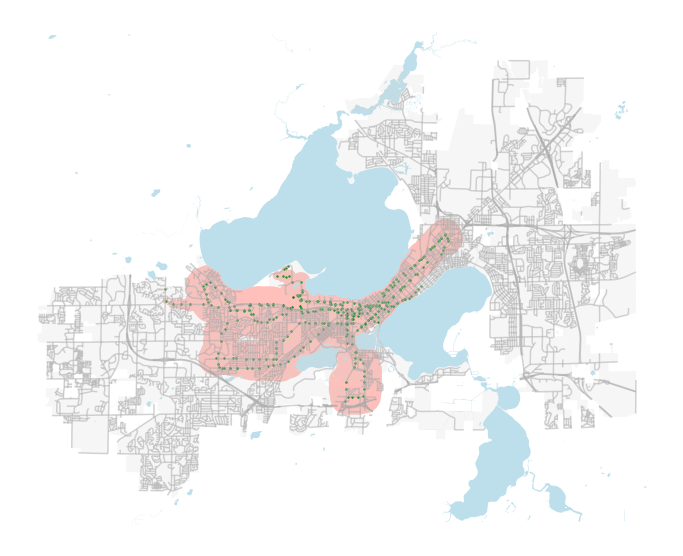

In [5]:
busSim = BusSim(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)
gdf = busSim.get_gdf(765)
city = gpd.read_file("./plot/background/madison-shp")
lakes = gpd.read_file("./plot/background/water-shp")
street = gpd.read_file("./plot/background/street-shp")

ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)
lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
gdf.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax)
gdf["geometry"].centroid.plot(color="green", ax=ax, markersize=2)

ax.set_axis_off()
busSim.get_area(gdf) #21786807.680050697

In [91]:
libdf = pd.read_excel("lib.xlsx")
city=gpd.read_file('zip://neighbor.zip')
water=gpd.read_file('zip://water.zip')

In [103]:
df_cencus=pd.read_csv('/Users/baizishan/Documents/Library/nip_neighbassoc_19.csv')#[['name','pc_trst','tot_pop_10','pc_un18_10','pc_ov64_10']]
df_cencus1=df_cencus.copy()
df_cencus2=df_cencus1.drop(df_cencus1.index[[75]])


139

In [145]:
g = gpd.GeoDataFrame.from_file("nip_plandistrict/nip_plandistrict_19.shp")
df_cen=pd.read_csv('/Users/baizishan/Documents/Library/Simulator/archive/nip_plandistrict_19.csv')
geo_list=[]
for i in range(len(g)):
    for j in range(len(df_cen)):
        if g.geo[i]==df_cen.name[j]:
                geo_list.append(g.geometry[i])
df_cen['geometry']=geo_list
df_cen.to_csv('df_cen.csv')

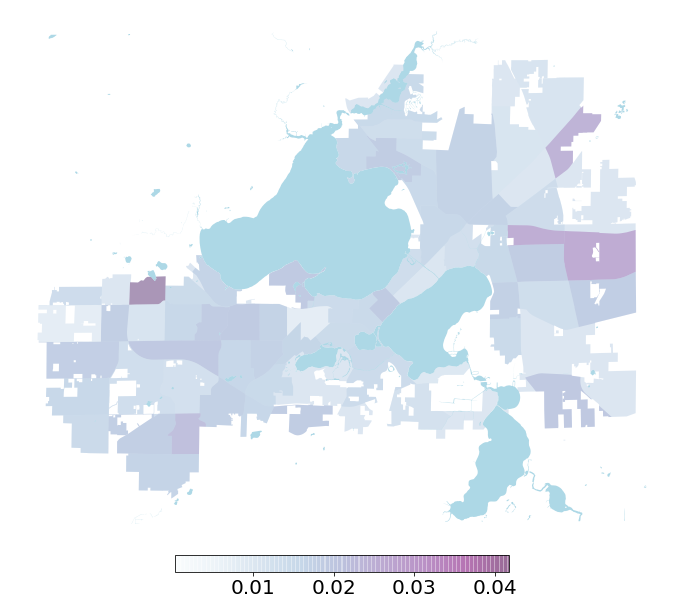

In [144]:
def Utility_Map(x,y,a,b):
    g = gpd.GeoDataFrame.from_file("nip_plandistrict/nip_plandistrict_19.shp")
    df_cen=pd.read_csv('/Users/baizishan/Documents/Library/Simulator/archive/nip_plandistrict_19.csv')
    geo_list=[]
    for i in range(len(g)):
        for j in range(len(df_cen)):
            if g.geo[i]==df_cen.name[j]:
                geo_list.append(g.geometry[i])
    df_cen['geometry']=geo_list
    x_sum=df_cen[x].sum()
    y_sum=df_cen[y].sum()
    df_cen['utility_map']=a*df_cen[x]/x_sum+b*df_cen[y]/y_sum
    
    gdf1 = gpd.GeoDataFrame(
        df_cen, geometry=df_cen.geometry)

    ax=gdf1.plot(column='utility_map', cmap='BuPu',figsize=(12,12),legend=True,alpha=0.35
                 ,legend_kwds={'orientation': "horizontal",
                               'shrink': 0.5,'alpha':0.35,'pad':0.01})
    fig = ax.figure
    cb_ax = fig.axes[1] 
    cb_ax.tick_params(labelsize=20)   
    water.plot(ax=ax,color='lightblue')
    ax.set_axis_off()
    
Utility_Map('pc_un18_10','pc_ov64_10',0.4,0.6)

1237949.869727701

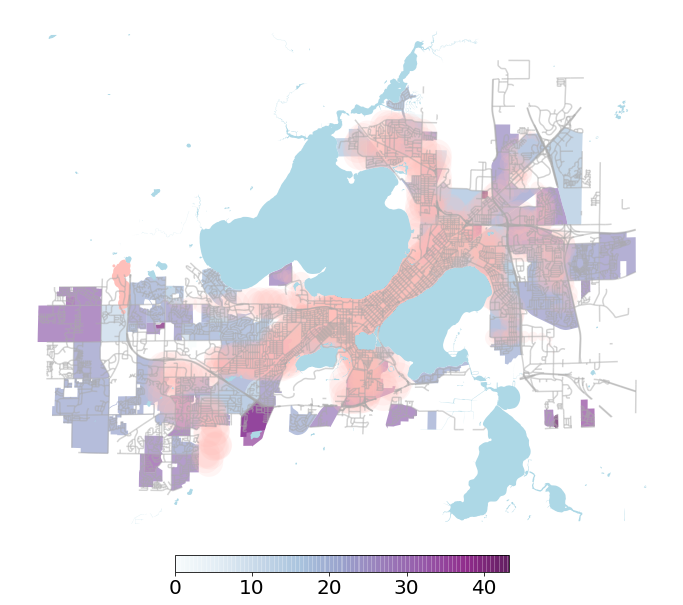

In [50]:
df_cencus=df_cencus.sort_values(by=["name"])
a=[]
for i in range(len(df_cencus)):
    for j in range(len(city)):
        if df_cencus.name[i]==city.NEIGHB_NAM[j]:
            a.append(city.geometry[j])
df_cencus2["Geo"]=a
gdf_demo = gpd.GeoDataFrame(
    df_cencus2, geometry=df_cencus2.Geo)

ax=gdf_demo.plot(column='pc_un18_10', cmap='BuPu',figsize=(12,12),legend=True,alpha=0.65
             ,legend_kwds={'orientation': "horizontal",
                           'shrink': 0.5,'alpha':0.65,'pad':0.01})
fig = ax.figure
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=20)
#plt.text(-89.49,42.95,"The Percentage of Teenagers under 18 by Neighborhood",size=19)    
water.plot(ax=ax,color='lightblue')


busSim = BusSim(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)
gdf = busSim.get_gdf(start_point=(43.076071,-89.517674))
gdf1 = busSim.get_gdf(start_point=(43.073691, -89.387407))
gdf2 = busSim.get_gdf(start_point=(43.101474, -89.346346))
gdf3 = busSim.get_gdf(start_point=(43.127783, -89.362315))
gdf4 = busSim.get_gdf(start_point=(43.032483, -89.479143))
gdf5 = busSim.get_gdf(start_point=(43.065924, -89.415187))
gdf6 = busSim.get_gdf(start_point=(43.084486, -89.323934))
gdf7 = busSim.get_gdf(start_point=(43.053816, -89.450558))
gdf8 = busSim.get_gdf(start_point=(43.041280, -89.394235))
#city = gpd.read_file("./plot/background/madison-shp")
#lakes = gpd.read_file("./plot/background/water-shp")
street = gpd.read_file("./plot/background/street-shp")

#ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)
#lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
gdf.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax)
gdf1.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax,alpha = 0.15)
gdf2.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax,alpha = 0.15)
gdf3.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax,alpha = 0.15)
gdf4.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax,alpha = 0.15)
gdf5.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax,alpha = 0.15)
gdf6.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax,alpha = 0.15)
gdf7.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax,alpha = 0.15)
gdf8.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax,alpha = 0.15)
#gdf["geometry"].centroid.plot(color="red", ax=ax, markersize=2)

ax.set_axis_off()
busSim.get_area(gdf) #21786807.680050697

In [22]:
df = busSim.stopTimes_final_df
df[df["stop_id"] == 967]

service_id  route_short_name  trip_id  stop_id  stop_sequence  \
32581     94_WKD                10  1027430      520             29   
32582     94_WKD                10  1027432      520             29   

         arrival_time  shape_dist_traveled   stop_lat   stop_lon  \
32581 0 days 12:28:21               5.2371  43.068634 -89.388936   
32582 0 days 12:58:21               5.2371  43.068634 -89.388936   

       cardinal_direction  
32581               180.0  
32582               180.0

21550622.595168628

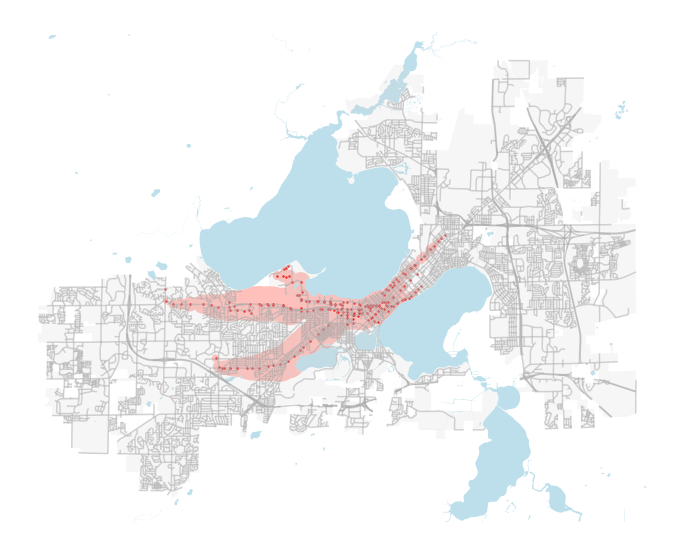

In [5]:
busSim = BusSim(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, trip_delays=[(1024695, "00:04:00")])
gdf = busSim.get_gdf(765)
city = gpd.read_file("../data/plot/background/madison-shp")
lakes = gpd.read_file("../data/plot/background/water-shp")
street = gpd.read_file("../data/plot/background/street-shp")

ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)
lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
gdf.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax)
gdf["geometry"].centroid.plot(color="red", ax=ax, markersize=2)

ax.set_axis_off()
busSim.get_area(gdf) #20682522.238682237

In [27]:
def fmin(minutes):
    return f"{minutes // 60}:{minutes % 60}:00"

perf = pd.DataFrame()

for t in [10, 20, 30, 40, 50, 60]:
    print(t)
    t0 = time.time()
    busSim = BusSim(DATA_PATH, DAY, START_TIME, fmin(t), AVG_WALKING_SPEED, MAX_WALKING_MIN)
    t1 = time.time()
    gdf = busSim.get_gdf(765)
    t2 = time.time()
    perf.loc[t, "graph-gen"] = t1 - t0
    perf.loc[t, "gen-dataframe"] = t2 - t1

perf

10
20
30
40
50
60


graph-gen  gen-dataframe
10   1.490974       0.436377
20   1.839939       0.471731
30   2.561392       0.488621
40   3.578030       0.581640
50   4.746873       0.643338
60   6.109272       0.678432

In [28]:
def fmin(minutes):
    return f"{minutes // 60}:{minutes % 60}:00"

perf = pd.DataFrame()

for t in [10, 20, 30, 40, 50, 60:
    print(t)
    t0 = time.time()
    busSim = BusSim(DATA_PATH, DAY, START_TIME, fmin(t), AVG_WALKING_SPEED, MAX_WALKING_MIN)
    t1 = time.time()
    gdf = busSim.get_gdf(start_point=(43.072076, -89.398291))
    t2 = time.time()
    perf.loc[t, "graph-gen"] = t1 - t0
    perf.loc[t, "gen-dataframe"] = t2 - t1

perf

10
20
30
40
50
60
70
80
90


graph-gen  gen-dataframe
10   1.564986       0.441076
20   1.821449       0.454345
30   2.485040       0.514306
40   3.429946       0.580983
50   4.576142       0.649454
60   5.923128       0.815186
70   7.881356       0.790881
80   9.760332       0.847786
90  11.980241       0.901834